<h2 style="background-color:powderblue;color:brown;"> <center> 19th Tropical Cyclones and Storm Surge Forecasters Training, RSMC, New Delhi </center> </h2> <hr>
<h1 style="color:tomato;"> <center>  Tropical Cyclone Features Analysis </center> </h1>
<h3 style="color:Blue;"><center>  Discussion Material with codes [4th April 08.30-10.20 UTC]</center> </h3>
<h4 style="color:Purple;"> <center>B. Arul Malar Kannan,Scientist IMD </center> </h4> <h5><center> ba.kannan@imd.gov.in </center><hr></h5> <p>We all know,  Weather radar gives more important information of near real time events and is the best tool for operational nowcasting by profiling/scanning the surrounding hemispherical atmosphere around the radar center by actively sending a microwave signal and processing the backscattering signals.</p><p>  The meteorological radars are primarily aimed for detecting precipitation and related phenomena.  However, by virtue signatures of all objects present around are invariably present. </p>
<p>  The present discussion is aimed to analyze the acquired radar data for Tropical cyclone features.</p>

### STEP - 1 : Import required PYTHON Libraries

In [1]:
#IMPORT REQUIRED PYTHON LIBRARIES
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pyart
import numpy as np


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


### Step 2: Read the Radar Data and understanding its contents

In [2]:
#READ THE FILE and get its contents
InputFile='data/IMDTEST200602235215'
radar=pyart.io.read(InputFile)
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (3600,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (3600,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	total_power:
		data: <ndarray of type: float32 and shape: (3600, 996)>
		units: dBZ
		standard_name: equivalent_reflectivity_factor
		long_name: Total power
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	reflectivity:
		data: <ndarray of type: float32 and shape: (3600, 996)>
		units: dBZ
		

<head>
    <h1>RAW DATA - The Usable Level II</h1>
    </head>
    <p>
    The pulse radar gets a basic resolution along the scanned range normally to the measure of the pulse width.  This is normally 150m [for 1micro seconds PW] and 300m[for a 2micro second PW].  The the angular resolution is approximately $1^0$ x $1^0$.  This base resolution of the entire volume is called a range bin.  All these range bins stacked along a particular direction of azimuth or elevation is termed as a ray, a collection of rays constitutes a sweep.  The sweep along a particular fixed elevation angle is called a PPI scan and the one with a fixed azimuth is termed as a RHI scan. The collection of these sweeps constitutes a volume scan.
    IMD radars perform two types of scan every ten minutes.  One for long range surveillance where the  reflectivity field is alone used and another volumetric data with ten sweeps, elevation angles 0.2, 1.5, 2.0, 3.0, 4.5, 6.0, 9.0, 12.0, 16.0, 21.0,  scan range 250km useful for weather study with all basic moments viz., reflectivity, velocity, spectrum width availability [SK Roy Bhowmick etal 2011]. 
    Present Day Dual Polarization techniques provides additional information or moments determined from the target namely, Differential reflectivity, Differential Phase, Correlation coefficient.
   </p>

In [3]:
ho=radar.altitude['data']/1000
Rmax=int(np.floor(np.mean(radar.instrument_parameters['unambiguous_range']['data'])/1000))
BW=radar.instrument_parameters['radar_beam_width_h']['data']
Elev=(radar.elevation['data'])[0::360]
print(ho,Rmax,BW, Elev)

[0.06] 249 [0.93] [ 0.3295898  1.1206055  2.15332    3.1420896  4.63623    6.1303706
  9.140625  12.128906  16.1499    21.11572  ]


<head>
    <h2>RADAR - Range Height Equation and Range Height Diagram of the data</h2>
    </head>
   <p> 
    Height of the radar beam at a slant range R from the radar location at a elevation angle $\phi$ is given by<blockquote><div>
    <strong>$h_R = \sqrt{R^2+(k_e R)^2+2 k_e R\sin\phi}- k_e R + h_0$ </strong><br /></div></blockquote>
  where,<br />
    	$k_e = 4/3$    <em>for a 4/3 effective earth radius model</em> <br />
    	$\phi$ is the elevation angle <br />
    	$h_0$ is the altitude (till the center of the radiating antenna feed)<br />
    </p>
    <img src="pic/picture1.png", ,width=50%,height=50%>

Elevation angles in the present data is: [ 0.3295898  1.1206055  2.15332    3.1420896  4.63623    6.1303706
  9.140625  12.128906  16.1499    21.11572  ]


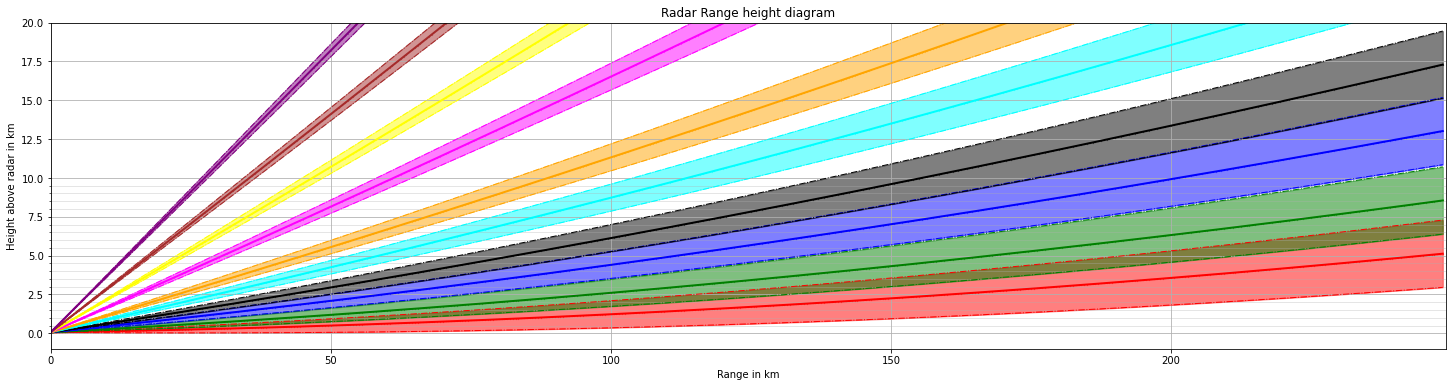

In [4]:
eee=Elev

print("Elevation angles in the present data is:", eee)
R=6371.0
k=4./3.
BW=1.0
elev=0.0
Rbin=0.5
def f(ra,p):
    return (((ra)**2.0)+((k*R)**2.0)+2*k*R*ra*np.sin(p))**0.5-k*R+ho


def rhii(elev,coo):
    phi=elev*np.pi/180.
    phi_ = np.radians(elev+BW/2.0)
    phi___ =np.radians(elev-BW/2.0)
    r=np.arange(0,Rmax,Rbin)
    h=np.zeros(len(r))
    h_ =np.zeros(len(r))
    h___ =np.zeros(len(r))
    for iii in np.arange(len(r)):
        h[iii]=f(r[iii],phi)
        h_[iii]=f(r[iii],phi_)
        h___[iii]=f(r[iii],phi___)
        bb=np.pi*(((h_-h___)/2)**2.)*r*20
    er=h_-h___
    ax.plot(r,h,linestyle='-', linewidth=2, marker='o',markersize=.2,color=coo, label=elev)
    ax.plot(r,h_,linestyle='-.', linewidth=1,color=coo) 
    ax.plot(r,h___,linestyle='-.', linewidth=1,color=coo) 
    ax.fill_between(r,h_, h___, color=coo, alpha=0.5 )
    

fig, ax = plt.subplots(figsize=(25,6))

coo=['red','green','blue','black','cyan','orange','magenta','yellow','brown','purple','gray','red','green','blue','cyan','k']
for ii in np.arange(len(eee)):
    rhii(eee[ii], coo[ii])
ax.set_xlabel('Range in km')
ax.set_ylabel('Height above radar in km')
ax.set_title('Radar Range height diagram')
ax.set_ylim([-1,20])
ax.set_xlim([0,Rmax])
minor_ticks=np.arange(0,10,0.5)
major_ticks=np.arange(0,10,1)

ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.4)
ax.grid()
#plt.show()

<head>
    <h4>Assignment: <p>1. From which start range to what end range hydrological products of radar are useful </p>
    <p> 2. When the maximum cloud detection is feasible with negative elevation angles why there is a restriction... Any comments? </p></h4>
    </head> 

<p>
Irrespective of the above calculation for the beam propagation still artifact lingers out of the anamolous propagation conditions where the refractive index variations are not to the normal way leading to sub/super refractions
    </p>
  <div class="left">
       <img src="pic/picture2.png", ,width=50%,height=50%/><br></a>
  </div>

In [5]:
#GET A GIST ON RADAR RECORDED VARIABLES & VALUES as Key Dictionary pair
radar.fields

{'total_power': {'units': 'dBZ',
  'standard_name': 'equivalent_reflectivity_factor',
  'long_name': 'Total power',
  'coordinates': 'elevation azimuth range',
  'data': masked_array(
    data=[[22.0, 40.0, 39.0, ..., --, --, --],
          [21.5, 37.0, 34.5, ..., --, --, --],
          [22.5, 38.5, 34.0, ..., --, --, --],
          ...,
          [19.5, 42.5, 40.0, ..., --, --, --],
          [23.0, 41.5, 43.0, ..., --, --, --],
          [23.5, 37.0, 40.0, ..., --, --, --]],
    mask=[[False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True],
          ...,
          [False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True]],
    fill_value=1e+20,
    dtype=float32),
  '_FillValue': -9999.0},
 'reflectivity': {'units': 'dBZ',
  'standard_name': 'equivalent_reflectivity_fa

### Step 3: Create a PPI Plot for the observed moments

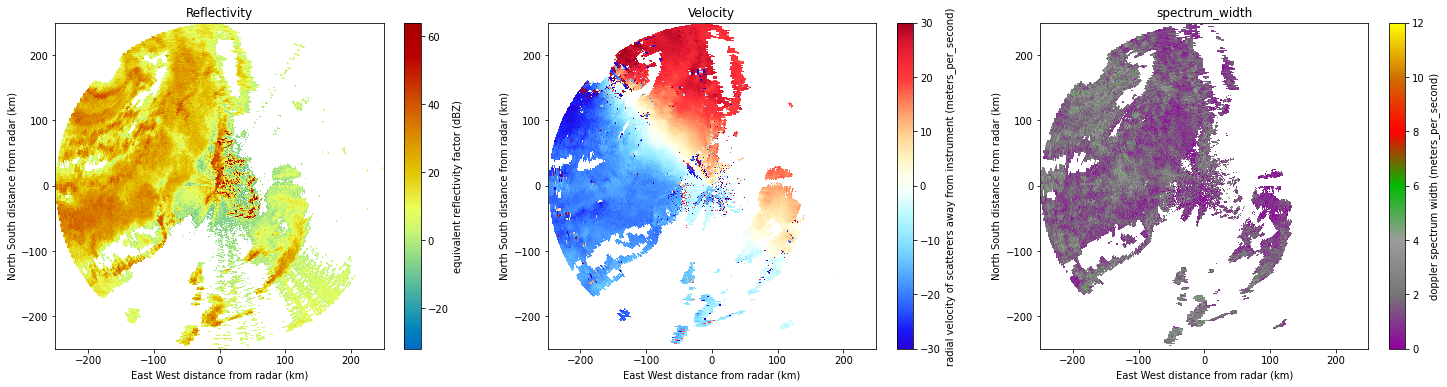

In [6]:
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(25,6))
ax1 = fig.add_subplot(131)
display.plot_ppi('total_power', 0, ax=ax1, vmin=-32, vmax=64., title="Reflectivity")
ax2 = fig.add_subplot(132)
display.plot_ppi('velocity', 0, ax=ax2,  title="Velocity")
ax3 = fig.add_subplot(133)
display.plot_ppi('spectrum_width', 0, ax=ax3,vmin=0,vmax=12,  title="spectrum_width")

<head><h4>Assignment: <p>3. Comment on the obsertvations of the above plot </p></h4>  </head>
<p> Hint:  Severe Weather Signatures, Wind...  Also refere to RHI plots below</p>

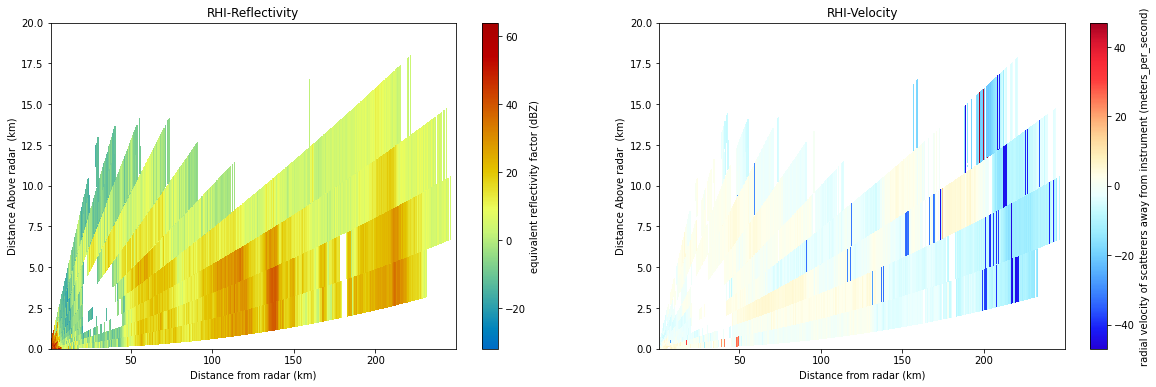

In [7]:
AZI=313
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
display.plot_azimuth_to_rhi('total_power', AZI, ax=ax1, vmin=-32, vmax=64., title="RHI-Reflectivity")
plt.ylim([0, 20]);
ax2 = fig.add_subplot(122)
display.plot_azimuth_to_rhi('velocity', AZI, ax=ax2, vmin=-47, vmax=47., title="RHI-Velocity")
plt.ylim([0, 20]);

### Step 4: TIME SERIES ANALYSIS

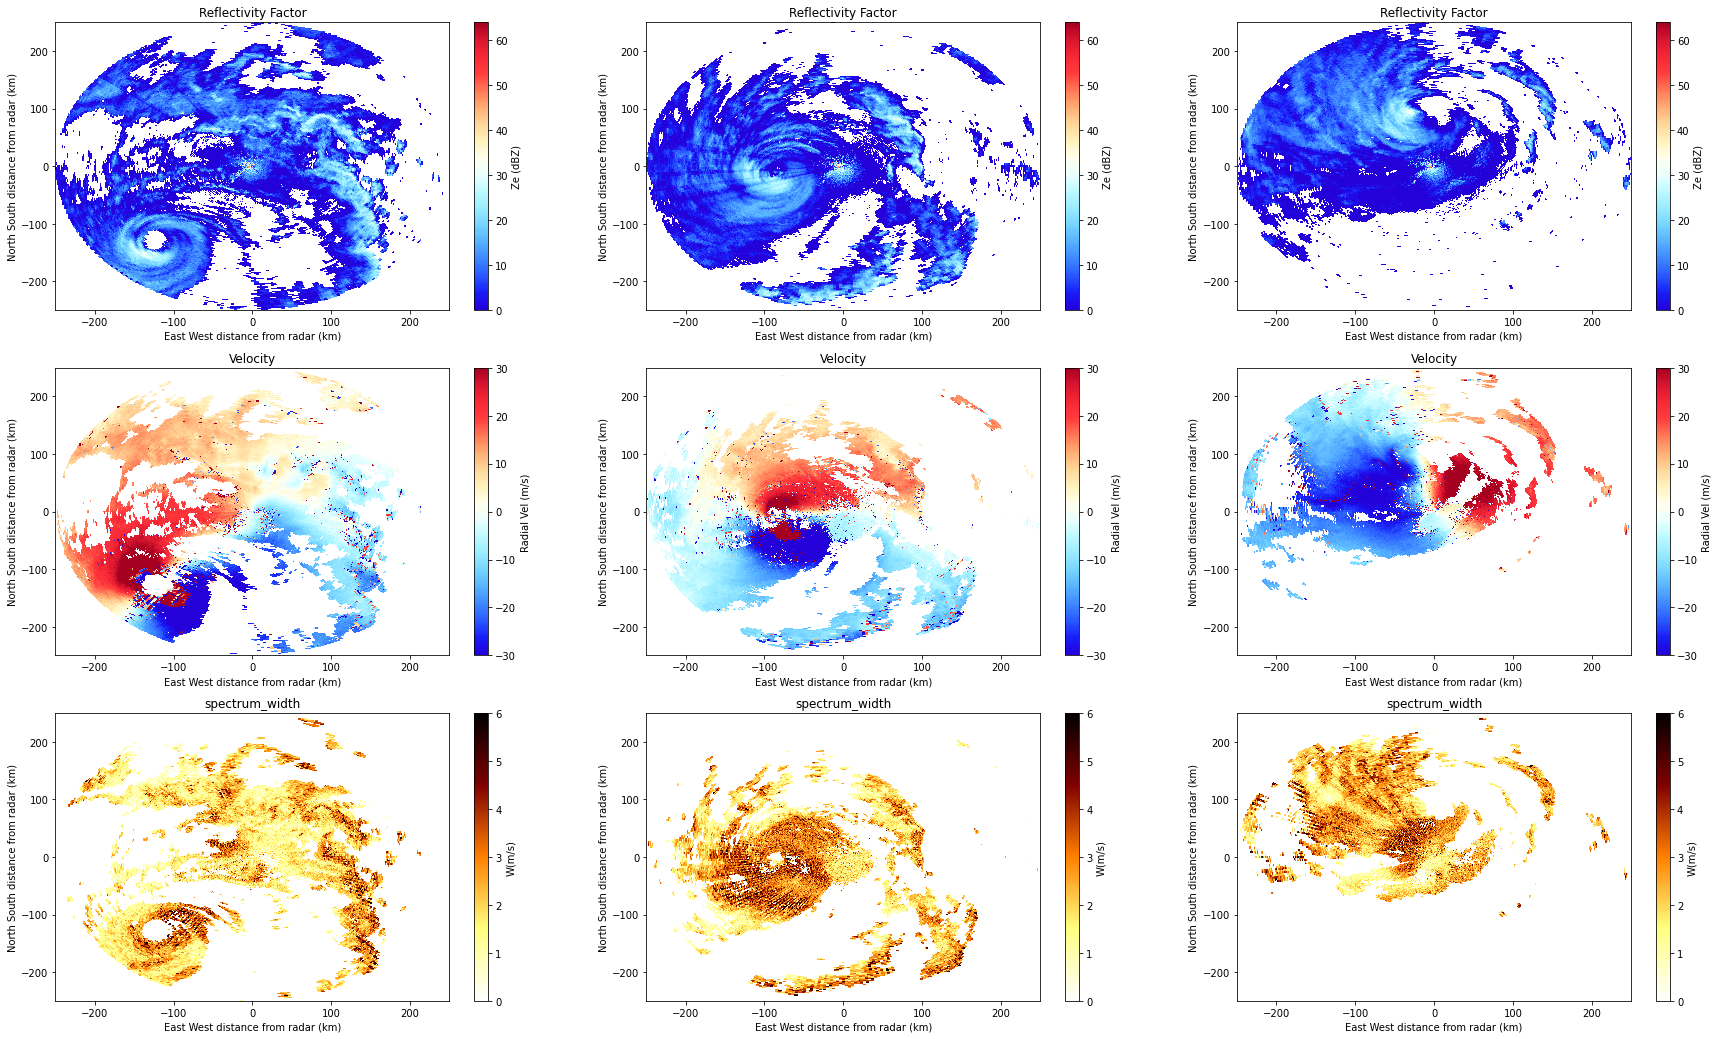

In [8]:
InputFile1='data/IMDTEST190502235218'
InputFile2='data/IMDTEST190503060219'
InputFile3='data/IMDTEST190503115218'
radar1=pyart.io.read(InputFile1)
radar2=pyart.io.read(InputFile2)
radar3=pyart.io.read(InputFile3)
display1 = pyart.graph.RadarDisplay(radar1)
display2 = pyart.graph.RadarDisplay(radar2)
display3 = pyart.graph.RadarDisplay(radar3)
fig = plt.figure(figsize=(30,18))
ax1 = fig.add_subplot(331)
display1.plot_ppi('total_power', 0, ax=ax1, cmap='pyart_BuDRd18', vmin=0, vmax=64.,colorbar_label="Ze (dBZ)", title="Reflectivity Factor")
ax2 = fig.add_subplot(334)
display1.plot_ppi('velocity', 0, ax=ax2, cmap='pyart_BuDRd18', colorbar_label="Radial Vel (m/s)", title="Velocity")
ax3 = fig.add_subplot(337)
display1.plot_ppi('spectrum_width', 0, ax=ax3,cmap='afmhot_r',vmin=0,vmax=6,colorbar_label="W(m/s)",  title="spectrum_width")
ax4 = fig.add_subplot(332)
display2.plot_ppi('total_power', 0, ax=ax4, cmap='pyart_BuDRd18',vmin=0, vmax=64.,colorbar_label="Ze (dBZ)", title="Reflectivity Factor")
ax5 = fig.add_subplot(335)
display2.plot_ppi('velocity', 0, ax=ax5,colorbar_label="Radial Vel (m/s)",  title="Velocity")
ax6 = fig.add_subplot(338)
display2.plot_ppi('spectrum_width', 0, ax=ax6,cmap='afmhot_r',vmin=0,vmax=6,colorbar_label="W(m/s)",  title="spectrum_width")
ax7 = fig.add_subplot(333)
display3.plot_ppi('total_power', 0, ax=ax7, cmap='pyart_BuDRd18',vmin=0, vmax=64.,colorbar_label="Ze (dBZ)", title="Reflectivity Factor")
ax8 = fig.add_subplot(336)
display3.plot_ppi('velocity', 0, ax=ax8,colorbar_label="Radial Vel (m/s)",  title="Velocity")
ax9 = fig.add_subplot(339)
display3.plot_ppi('spectrum_width', 0, ax=ax9,cmap='afmhot_r',vmin=0,vmax=6,colorbar_label="W(m/s)",  title="spectrum_width")

<head><h4>Assignment: <p>4. Comment on the obsertvations of the above plot </p> <p>5. Why the System shows sudden variations?</p></h4>  </head>
<p> Hint:  Recurvature, Shear, Reorganization support features, Wind analysis...  </p>

max height 4300.0  meters
min height 2.0  meters
max height 7633.0  meters
min height 16.0  meters
max height 8239.0  meters
min height 34.0  meters
max height 9242.0  meters
min height 50.0  meters
max height 10081.0  meters
min height 78.0  meters
max height 10108.0  meters
min height 103.0  meters
max height 10662.0  meters
min height 154.0  meters
max height 10389.0  meters
min height 206.0  meters
max height 10815.0  meters
min height 275.0  meters
max height 10947.0  meters
min height 357.0  meters
6


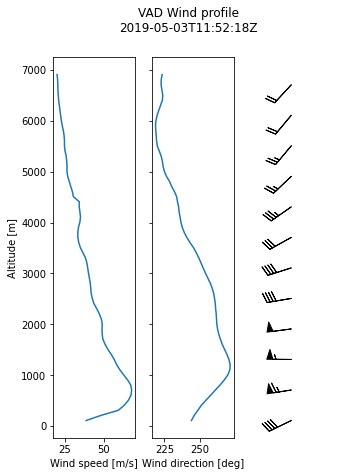

In [9]:
# Loop on all sweeps and compute VAD
zlevels = np.arange(100, 7000, 100)  # height above radar
u_allsweeps = []
v_allsweeps = []
RDR=radar3
for idx in range(RDR.nsweeps):
    radar_1sweep = RDR.extract_sweeps([idx]);
    vad = pyart.retrieve.vad_browning(radar_1sweep, "velocity", z_want=zlevels);
    u_allsweeps.append(vad.u_wind);
    v_allsweeps.append(vad.v_wind);

# Average U and V over all sweeps and compute magnitude and angle
u_avg = np.nanmean(np.array(u_allsweeps), axis=0);
v_avg = np.nanmean(np.array(v_allsweeps), axis=0);
orientation = (np.rad2deg(np.arctan2(-u_avg, -v_avg))) % 360;#+180
speed = np.sqrt(u_avg**2 + v_avg**2);

# Display vertical profile of wind
fig, ax = plt.subplots(1, 3, sharey=True,figsize=[5,7]);
ax[0].plot(speed * 2, zlevels + RDR.altitude["data"]);
ax[1].plot(orientation, zlevels + RDR.altitude["data"]);
ax[0].set_xlabel("Wind speed [m/s]");
ax[1].set_xlabel("Wind direction [deg]");
ax[0].set_ylabel("Altitude [m]");
fig.suptitle("VAD Wind profile"+"\n"+RDR.time['units'][-20:])
u = (np.ma.masked_array(u_avg, mask=False))*1.94364;
v = (np.ma.masked_array(v_avg, mask=False))*1.94364;
nbarbs = (~u.mask).sum();
#skip = max(1, int(nbarbs//5));
skip = max(1, int(nbarbs//10));
print(skip)
bloc = 0.5;
ax[2].barbs((np.zeros(zlevels.shape)+bloc)[::skip]-0.5, zlevels[::skip]+RDR.altitude['data'],u[::skip], v[::skip],);
ax[2].axis("off");

<head><h4>Assignment: <p>6. Comment on the wind direction variation </p> </h4>  </head>
<p> Hint:  True wind and Radial wind...  </p>

### Step 5: Data Cartesian gridding and creating Georeferenced plots

In [10]:
#Filter and Cartesian GRID the radar data for further processing
gatefilter = pyart.filters.GateFilter(radar1)
gatefilter.exclude_below('total_power', -5) #-5dBZ
gatefilter.exclude_below('reflectivity', -5) #-5dBZ

#Grid Voxel count are 200 x 200 x 40 (X,Y,Z)
#That covers -250km to +250km x -250km to +250km x 0km to 20 km range around the radar
grid = pyart.map.grid_from_radars(radar1, grid_shape=(41, 201, 201),
                                  grid_limits=((0.,20000,), (-250000., 250000.), (-250000, 250000.)))
#Resolution vertical:500m horizontal2500m

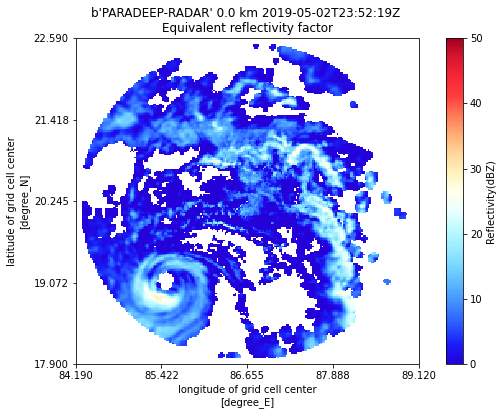

In [11]:
#PLOT THE GRID GEO-REFERRED
#create a figure dimension
fig = plt.figure(figsize=[10, 6])
#Create a display variable
display = pyart.graph.GridMapDisplay(grid, debug=False)


#Plot the reflectivity field between 0 to 50dBZ
display.plot_grid('reflectivity', level=0, vmin=0, vmax=50, cmap='pyart_BuDRd18')

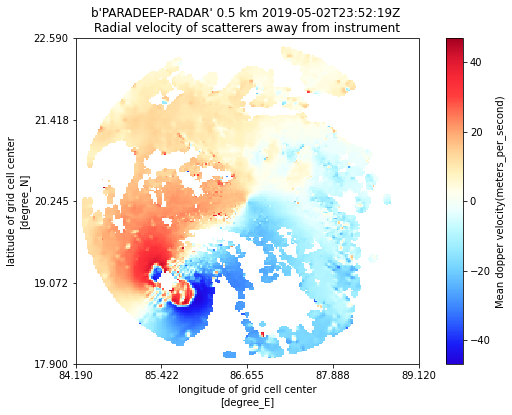

In [12]:
#create a figure dimension
fig = plt.figure(figsize=[10, 6])
#Plot the velocity field
display.plot_grid('velocity', level=1, vmin=-47, vmax=47, cmap='pyart_BuDRd18')

<head><h4>Assignment: <p>7. Fix the Center of the Tropical storm </p><p>8. Any variations in centre guess from Reflectivity and velocity field? </p>
    <p>9. Comment on system variation with height</p> </h4>  </head>
<p> Hint:  Parse through various levels...  </p>

### Step 6: Creating Cross sectional plots from gridded data

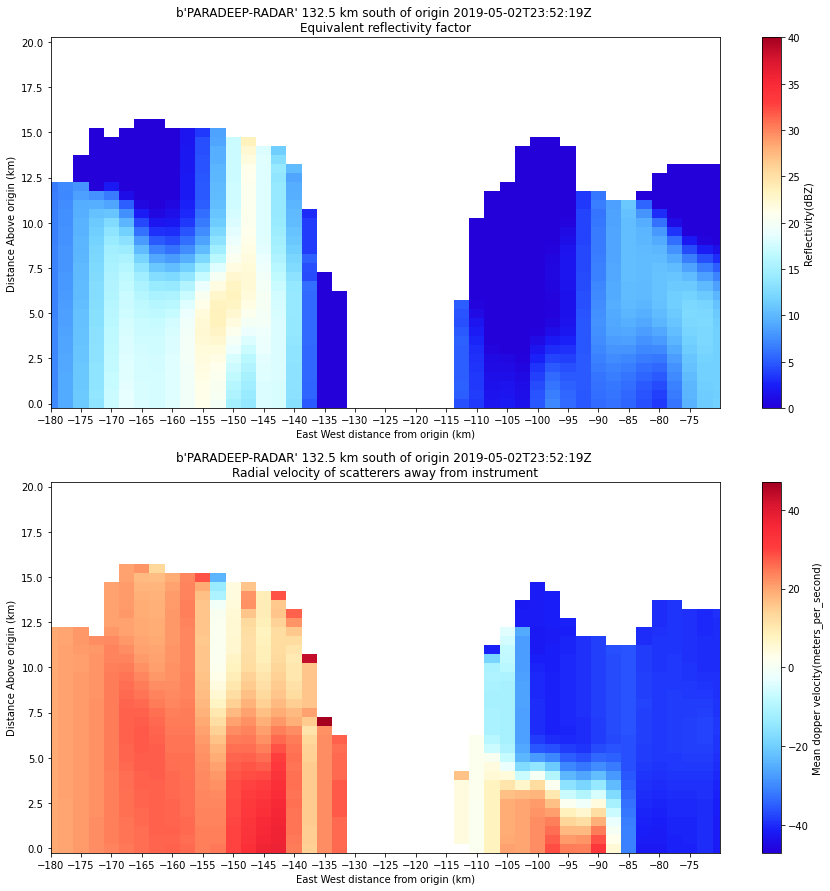

In [13]:
#STUDY THE EYE Crosssection
fig = plt.figure(figsize=[15, 15])
ax1 =fig.add_subplot(211)
display.plot_latitude_slice('reflectivity', lat=19.073, vmin=0, vmax=40, ax=ax1,cmap='pyart_BuDRd18')
plt.xlim([-180, -70])
ax2 =fig.add_subplot(212)
display.plot_latitude_slice('velocity', lat=19.073, vmin=-47, vmax=47, ax=ax2,cmap='pyart_BuDRd18')
plt.xlim([-180, -70])
ax1.set_xticks(np.arange(-180,-70,5),rotation=45);
ax2.set_xticks(np.arange(-180,-70,5),rotation=45);
#fig.savefig('XZ_CROSS_dBZ_19.073.png')

<head><h4>Assignment: <p>10. Comment on Eye variation with Height </p><p>11.Comment on RMR, RMV Values </p>
    <p>12. Is the system symmetric? </p> </h4>  </head>
<p> Hint:  Also verify below plot...  </p>

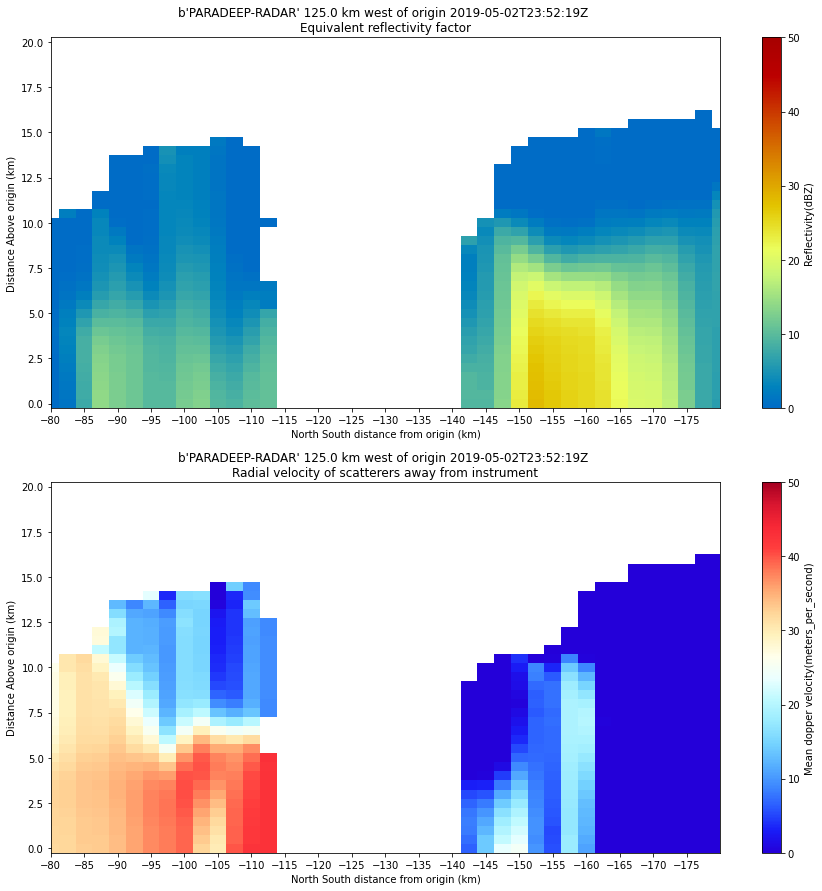

In [14]:
#CREATE CROSS-SECTION PLOT ALONG A LONGITUDE
fig = plt.figure(figsize=[15, 15])
ax1 =fig.add_subplot(211)
display.plot_longitude_slice('reflectivity', lon=85.458, vmin=0, vmax=50)
plt.xlim([-80, -180])
ax1.set_xticks(np.arange(-80,-180,-5),rotation=45);
ax2 =fig.add_subplot(212)
display.plot_longitude_slice('velocity', lon=85.458, vmin=0, vmax=50)
plt.xlim([-80, -180])
ax2.set_xticks(np.arange(-80,-180,-5),rotation='vertical');